In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor

In [2]:
X = np.load('initial_inputs.npy')
Y = np.load('initial_outputs.npy')

In [3]:
# Week 1
X = np.append(X, np.array([[0.0, 0.999999]]), axis=0)
Y = np.append(Y, 0.0519568844076447)

In [4]:
# Week 2
X = np.append(X, np.array([[0.999999, 0.999999]]), axis=0)
Y = np.append(Y, -0.01580391485)

In [5]:
# Week 3, submission for M15, submitted on Mon Hune 2024
X = np.append(X, np.array([[0.000000, 0.696970]]), axis=0)
Y = np.append(Y, 5.56E-170)

In [6]:
print('X : ',  X)
print('Y : ', Y)

X :  [[0.66579958 0.12396913]
 [0.87779099 0.7786275 ]
 [0.14269907 0.34900513]
 [0.84527543 0.71112027]
 [0.45464714 0.29045518]
 [0.57771284 0.77197318]
 [0.43816606 0.68501826]
 [0.34174959 0.02869772]
 [0.33864816 0.21386725]
 [0.70263656 0.9265642 ]
 [0.         0.999999  ]
 [0.999999   0.999999  ]
 [0.         0.69697   ]]
Y :  [ 5.38996119e-001  4.20586240e-001 -6.56236244e-002  2.93992912e-001
  2.14964510e-001  2.31055498e-002  2.44619344e-001  3.87490152e-002
 -1.38576181e-002  6.11205216e-001  5.19568844e-002 -1.58039148e-002
  5.56000000e-170]


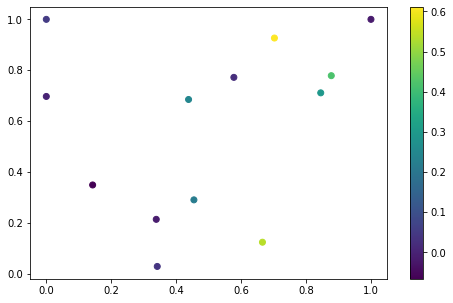

In [7]:
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(8)
plt.scatter(X[:, 0], X[:, 1], c = Y)
plt.colorbar();

In [8]:
import itertools as it

In [9]:
dim = 2
X_grid = np.fromiter(it.chain(*it.product(np.linspace(0, 1, 100), repeat=dim)), dtype=float).reshape(-1,dim)

In [10]:
def upper_confidance_bound(i_param, o_param):
    gpr = GaussianProcessRegressor()
    gpr.fit(i_param, o_param)
    mean, std = gpr.predict(X_grid, return_std = True)
    ucb = mean + 1.1 * std
    return ucb


In [11]:
def get_next(upper_conf):
    idx_max = np.argmax(upper_conf)
    next_query = X_grid[idx_max]
    return next_query

In [12]:
ucb = upper_confidance_bound(X,Y)

In [13]:
print(get_next(upper_conf=ucb))

[0.32323232 1.        ]
